In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
main_directory = 'weather'
airport_data = {}

for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)
    airport_data[subdir] = [] 

    for f in os.listdir(subdir_path):
        if f[0:4] in ['2016', '2017']:
            file_path = os.path.join(subdir_path, f)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
                nd = data['data']['weather']
                for i in nd:
                    flattened_df = pd.json_normalize(i, record_path=['hourly'], meta=['date'], errors='ignore')
                    airport_data[subdir].append(flattened_df) 

airport_dfs = []
for airport, dfs in airport_data.items():
    airport_df = pd.concat(dfs, ignore_index=True)
    airport_df['airport'] = airport
    airport_dfs.append(airport_df)


combined_df = pd.concat(airport_dfs, ignore_index=True)
reqcol = ['windspeedKmph','winddirDegree','weatherCode','precipMM','visibility','pressure','cloudcover','DewPointF','WindGustKmph','tempF','WindChillF','humidity','date','time','airport']
combined_df = combined_df[reqcol]
numeric_cols = ['windspeedKmph','winddirDegree','weatherCode','precipMM','visibility','pressure','cloudcover','DewPointF','WindGustKmph','tempF','WindChillF','humidity','time']

for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df.to_csv('weather_data.csv', index=False)

In [3]:
combined_df.dtypes

windspeedKmph      int64
winddirDegree      int64
weatherCode        int64
precipMM         float64
visibility         int64
pressure           int64
cloudcover         int64
DewPointF          int64
WindGustKmph       int64
tempF              int64
WindChillF         int64
humidity           int64
date              object
time               int64
airport           object
dtype: object

In [4]:
main_dir = 'flight'

all_csv_files = []

# Gather all .csv files from the directory
for subdir in os.listdir(main_dir):
    subdir_path = os.path.join(main_dir, subdir)
    if os.path.isdir(subdir_path):
        for sub_subdir in os.listdir(subdir_path):
            sub_subdir_path = os.path.join(subdir_path, sub_subdir)
            if os.path.isdir(sub_subdir_path):
                for file in os.listdir(sub_subdir_path):
                    file_path = os.path.join(sub_subdir_path, file)
                    if file_path.endswith('.csv'):
                        all_csv_files.append(file_path)

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Specify required columns
req_col = ['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Origin', 'Dest']

# Read and concatenate all CSV files
for idx, file in enumerate(all_csv_files):
    print(f"Reading file {idx+1}/{len(all_csv_files)}: {file}")
    data = pd.read_csv(file, usecols=req_col, low_memory=False)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# List of target airports
airports = ["ATL", "CLT", "DEN", "DFW", "EWR", "IAH", "JFK", "LAS", "LAX", "MCO", "MIA", "ORD", "PHX", "SEA", "SFO"]

# Filter data for the specified airports
combined_data = combined_data[(combined_data['Origin'].isin(airports)) & (combined_data['Dest'].isin(airports))]

# Save the combined data to a CSV file
combined_data.to_csv('Flight_data.csv', index=False, encoding='utf-8')
print("Combined data saved to 'Flight_data.csv'.")


Reading file 1/24: flight/2017/On_Time_On_Time_Performance_2017_12/On_Time_On_Time_Performance_2017_12.csv
Reading file 2/24: flight/2017/On_Time_On_Time_Performance_2017_9/On_Time_On_Time_Performance_2017_9.csv
Reading file 3/24: flight/2017/On_Time_On_Time_Performance_2017_7/On_Time_On_Time_Performance_2017_7.csv
Reading file 4/24: flight/2017/On_Time_On_Time_Performance_2017_1/On_Time_On_Time_Performance_2017_1.csv
Reading file 5/24: flight/2017/On_Time_On_Time_Performance_2017_6/On_Time_On_Time_Performance_2017_6.csv
Reading file 6/24: flight/2017/On_Time_On_Time_Performance_2017_8/On_Time_On_Time_Performance_2017_8.csv
Reading file 7/24: flight/2017/On_Time_On_Time_Performance_2017_11/On_Time_On_Time_Performance_2017_11.csv
Reading file 8/24: flight/2017/On_Time_On_Time_Performance_2017_10/On_Time_On_Time_Performance_2017_10.csv
Reading file 9/24: flight/2017/On_Time_On_Time_Performance_2017_3/On_Time_On_Time_Performance_2017_3.csv
Reading file 10/24: flight/2017/On_Time_On_Time_P

In [5]:
combined_data.shape

(1877296, 17)

In [6]:
df1 = pd.DataFrame()
df1 = combined_data
df1

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
18,2017,4,12,1,2017-12-01,14107,PHX,12892,LAX,1128,1124.0,0.0,0.0,1213,1200.0,0.0,0.0
19,2017,4,12,1,2017-12-01,14107,PHX,12892,LAX,1820,1809.0,0.0,0.0,1852,1829.0,0.0,0.0
25,2017,4,12,1,2017-12-01,14107,PHX,14771,SFO,1945,2001.0,16.0,1.0,2052,2105.0,13.0,0.0
57,2017,4,12,1,2017-12-01,12892,LAX,14747,SEA,1515,1510.0,0.0,0.0,1819,1805.0,0.0,0.0
63,2017,4,12,1,2017-12-01,11298,DFW,14771,SFO,1920,1913.0,0.0,0.0,2133,2115.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292256,2016,1,1,3,2016-01-03,13204,MCO,13930,ORD,1130,1128.0,0.0,0.0,1330,1317.0,0.0,0.0
11292266,2016,1,1,3,2016-01-03,14107,PHX,11292,DEN,2110,2152.0,42.0,1.0,2259,2338.0,39.0,1.0
11292267,2016,1,1,3,2016-01-03,11292,DEN,14107,PHX,1830,1928.0,58.0,1.0,2024,2117.0,53.0,1.0
11292268,2016,1,1,3,2016-01-03,13930,ORD,13204,MCO,925,1039.0,74.0,1.0,1312,1419.0,67.0,1.0


In [7]:
df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15'],
      dtype='object')

In [8]:
df2 = pd.DataFrame()
df2 = combined_df
df2

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
0,10,209,122,0.0,10,1012,99,60,14,63,63,90,2016-02-01,0,IAH
1,8,209,122,0.0,10,1012,99,60,11,63,63,90,2016-02-01,100,IAH
2,6,209,122,0.0,10,1012,100,60,9,63,63,90,2016-02-01,200,IAH
3,5,209,122,0.1,10,1012,100,60,6,63,63,90,2016-02-01,300,IAH
4,5,195,122,0.1,10,1012,100,60,6,62,62,90,2016-02-01,400,IAH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,19,110,113,0.0,10,1018,0,74,22,87,87,65,2017-05-31,1900,MIA
263156,18,110,113,0.0,10,1018,0,74,21,86,86,67,2017-05-31,2000,MIA
263157,17,110,113,0.0,10,1018,0,74,20,85,85,69,2017-05-31,2100,MIA
263158,15,113,113,0.0,10,1018,8,73,19,84,84,70,2017-05-31,2200,MIA


In [9]:
df2.columns

Index(['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport'],
      dtype='object')

In [10]:
df1['CRSDepTime'],df2['time']

(18          1128
 19          1820
 25          1945
 57          1515
 63          1920
             ... 
 11292256    1130
 11292266    2110
 11292267    1830
 11292268     925
 11292269     630
 Name: CRSDepTime, Length: 1877296, dtype: int64,
 0            0
 1          100
 2          200
 3          300
 4          400
           ... 
 263155    1900
 263156    2000
 263157    2100
 263158    2200
 263159    2300
 Name: time, Length: 263160, dtype: int64)

In [11]:
#time in df2 is a multiple of 100 , so we have to round the values in CRSDEPTIME 
val = []
for i in df1['CRSDepTime'] : 
    rem = i % 100 
    if rem < 30 : 
        val.append(i - rem)
    else : 
        val.append(i + (100 - rem))
df1['Time'] = val
df1['Time']

18          1100
19          1800
25          2000
57          1500
63          1900
            ... 
11292256    1200
11292266    2100
11292267    1900
11292268     900
11292269     700
Name: Time, Length: 1877296, dtype: int64

In [12]:
df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'Time'],
      dtype='object')

In [13]:
df2.columns

Index(['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport'],
      dtype='object')

In [14]:
df1.dtypes,df2.dtypes

(Year                 int64
 Quarter              int64
 Month                int64
 DayofMonth           int64
 FlightDate          object
 OriginAirportID      int64
 Origin              object
 DestAirportID        int64
 Dest                object
 CRSDepTime           int64
 DepTime            float64
 DepDelayMinutes    float64
 DepDel15           float64
 CRSArrTime           int64
 ArrTime            float64
 ArrDelayMinutes    float64
 ArrDel15           float64
 Time                 int64
 dtype: object,
 windspeedKmph      int64
 winddirDegree      int64
 weatherCode        int64
 precipMM         float64
 visibility         int64
 pressure           int64
 cloudcover         int64
 DewPointF          int64
 WindGustKmph       int64
 tempF              int64
 WindChillF         int64
 humidity           int64
 date              object
 time               int64
 airport           object
 dtype: object)

In [15]:
df3 = pd.merge(df1,df2,how='left',left_on=['FlightDate','Time','Origin'], right_on=['date','time','airport'])

In [16]:
df3

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
0,2017,4,12,1,2017-12-01,14107,PHX,12892,LAX,1128,...,1015.0,100.0,34.0,12.0,69.0,69.0,28.0,2017-12-01,1100.0,PHX
1,2017,4,12,1,2017-12-01,14107,PHX,12892,LAX,1820,...,1013.0,100.0,33.0,8.0,75.0,75.0,21.0,2017-12-01,1800.0,PHX
2,2017,4,12,1,2017-12-01,14107,PHX,14771,SFO,1945,...,1014.0,35.0,37.0,4.0,75.0,75.0,25.0,2017-12-01,2000.0,PHX
3,2017,4,12,1,2017-12-01,12892,LAX,14747,SEA,1515,...,1015.0,50.0,53.0,16.0,57.0,56.0,85.0,2017-12-01,1500.0,LAX
4,2017,4,12,1,2017-12-01,11298,DFW,14771,SFO,1920,...,1019.0,7.0,47.0,15.0,69.0,69.0,46.0,2017-12-01,1900.0,DFW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,2016-01-03,13204,MCO,13930,ORD,1130,...,1017.0,100.0,56.0,20.0,61.0,59.0,88.0,2016-01-03,1200.0,MCO
1877292,2016,1,1,3,2016-01-03,14107,PHX,11292,DEN,2110,...,1013.0,99.0,38.0,27.0,62.0,62.0,42.0,2016-01-03,2100.0,PHX
1877293,2016,1,1,3,2016-01-03,11292,DEN,14107,PHX,1830,...,1031.0,100.0,24.0,10.0,24.0,20.0,100.0,2016-01-03,1900.0,DEN
1877294,2016,1,1,3,2016-01-03,13930,ORD,13204,MCO,925,...,1022.0,100.0,21.0,28.0,24.0,12.0,89.0,2016-01-03,900.0,ORD


In [17]:
df3.shape

(1877296, 33)

In [18]:
df3.isnull().sum()

Year                   0
Quarter                0
Month                  0
DayofMonth             0
FlightDate             0
OriginAirportID        0
Origin                 0
DestAirportID          0
Dest                   0
CRSDepTime             0
DepTime            20980
DepDelayMinutes    20987
DepDel15           20987
CRSArrTime             0
ArrTime            22080
ArrDelayMinutes    25860
ArrDel15           25860
Time                   0
windspeedKmph      19409
winddirDegree      19409
weatherCode        19409
precipMM           19409
visibility         19409
pressure           19409
cloudcover         19409
DewPointF          19409
WindGustKmph       19409
tempF              19409
WindChillF         19409
humidity           19409
date               19409
time               19409
airport            19409
dtype: int64

In [19]:
df3 = df3.dropna()

In [20]:
df3.isnull().sum()

Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
Time               0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
date               0
time               0
airport            0
dtype: int64

In [21]:
df3.shape

(1832252, 33)

In [22]:
df3.dtypes

Year                 int64
Quarter              int64
Month                int64
DayofMonth           int64
FlightDate          object
OriginAirportID      int64
Origin              object
DestAirportID        int64
Dest                object
CRSDepTime           int64
DepTime            float64
DepDelayMinutes    float64
DepDel15           float64
CRSArrTime           int64
ArrTime            float64
ArrDelayMinutes    float64
ArrDel15           float64
Time                 int64
windspeedKmph      float64
winddirDegree      float64
weatherCode        float64
precipMM           float64
visibility         float64
pressure           float64
cloudcover         float64
DewPointF          float64
WindGustKmph       float64
tempF              float64
WindChillF         float64
humidity           float64
date                object
time               float64
airport             object
dtype: object

In [23]:
df3 = df3.drop(['FlightDate','Origin','date','airport','Dest'],axis = 1)

In [24]:
df3.to_csv('Final.csv')

In [25]:
df3.shape

(1832252, 28)

In [26]:
correlation = df3.corr()
correlation

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
Year,1.000000,-0.001483,-0.002145,0.000218,0.000224,0.000249,0.001740,0.002140,0.003828,0.005822,...,0.008962,0.058139,-0.043696,-0.089914,-0.017496,0.040897,-0.011096,0.003865,-0.043701,0.002274
Quarter,-0.001483,1.000000,0.970570,0.010509,0.003069,0.003516,-0.002930,-0.004599,-0.016152,-0.020527,...,-0.038143,0.119444,0.037920,-0.087048,0.134386,-0.093244,0.153259,0.149326,-0.054139,-0.003006
Month,-0.002145,0.970570,1.000000,0.010307,0.003110,0.003578,-0.002547,-0.004290,-0.017870,-0.021429,...,-0.040814,0.120670,0.043159,-0.084429,0.123651,-0.090511,0.142730,0.138353,-0.053282,-0.002688
DayofMonth,0.000218,0.010509,0.010307,1.000000,0.000315,0.000351,-0.000321,-0.000916,-0.006798,-0.007230,...,-0.002002,0.024913,-0.033450,-0.015267,0.018350,0.006183,0.016645,0.016157,-0.001303,-0.000359
OriginAirportID,0.000224,0.003069,0.003110,0.000315,1.000000,-0.025931,-0.053714,-0.052464,0.007305,0.012840,...,-0.029705,-0.018600,-0.057699,0.072772,-0.017804,-0.044907,-0.050461,-0.046876,0.098901,-0.053326
DestAirportID,0.000249,0.003516,0.003578,0.000351,-0.025931,1.000000,0.068186,0.066555,0.016815,0.031905,...,-0.010610,0.013812,-0.029587,-0.014177,-0.057423,0.001706,-0.030467,-0.029079,-0.025038,0.067611
CRSDepTime,0.001740,-0.002930,-0.002547,-0.000321,-0.053714,0.068186,1.000000,0.961961,0.107215,0.157714,...,0.036285,0.108916,-0.076978,-0.056793,0.035307,0.122990,0.157676,0.156836,-0.200023,0.997527
DepTime,0.002140,-0.004599,-0.004290,-0.000916,-0.052464,0.066555,0.961961,1.000000,0.140786,0.205184,...,0.039140,0.106225,-0.077294,-0.053908,0.034474,0.123765,0.157661,0.155870,-0.200269,0.960318
DepDelayMinutes,0.003828,-0.016152,-0.017870,-0.006798,0.007305,0.016815,0.107215,0.140786,1.000000,0.608310,...,0.082383,-0.019717,-0.052345,0.031714,0.038099,0.071795,0.029580,0.027331,0.004360,0.106847
DepDel15,0.005822,-0.020527,-0.021429,-0.007230,0.012840,0.031905,0.157714,0.205184,0.608310,1.000000,...,0.081131,-0.012922,-0.060240,0.029641,0.036960,0.073345,0.036275,0.033204,-0.005941,0.157336


In [ ]:
df3

In [29]:
correlation = df3.corr()
correlation

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
Year,1.000000,-0.001483,-0.002145,0.000218,0.000224,0.000249,0.001740,0.002140,0.003828,0.005822,...,0.008962,0.058139,-0.043696,-0.089914,-0.017496,0.040897,-0.011096,0.003865,-0.043701,0.002274
Quarter,-0.001483,1.000000,0.970570,0.010509,0.003069,0.003516,-0.002930,-0.004599,-0.016152,-0.020527,...,-0.038143,0.119444,0.037920,-0.087048,0.134386,-0.093244,0.153259,0.149326,-0.054139,-0.003006
Month,-0.002145,0.970570,1.000000,0.010307,0.003110,0.003578,-0.002547,-0.004290,-0.017870,-0.021429,...,-0.040814,0.120670,0.043159,-0.084429,0.123651,-0.090511,0.142730,0.138353,-0.053282,-0.002688
DayofMonth,0.000218,0.010509,0.010307,1.000000,0.000315,0.000351,-0.000321,-0.000916,-0.006798,-0.007230,...,-0.002002,0.024913,-0.033450,-0.015267,0.018350,0.006183,0.016645,0.016157,-0.001303,-0.000359
OriginAirportID,0.000224,0.003069,0.003110,0.000315,1.000000,-0.025931,-0.053714,-0.052464,0.007305,0.012840,...,-0.029705,-0.018600,-0.057699,0.072772,-0.017804,-0.044907,-0.050461,-0.046876,0.098901,-0.053326
DestAirportID,0.000249,0.003516,0.003578,0.000351,-0.025931,1.000000,0.068186,0.066555,0.016815,0.031905,...,-0.010610,0.013812,-0.029587,-0.014177,-0.057423,0.001706,-0.030467,-0.029079,-0.025038,0.067611
CRSDepTime,0.001740,-0.002930,-0.002547,-0.000321,-0.053714,0.068186,1.000000,0.961961,0.107215,0.157714,...,0.036285,0.108916,-0.076978,-0.056793,0.035307,0.122990,0.157676,0.156836,-0.200023,0.997527
DepTime,0.002140,-0.004599,-0.004290,-0.000916,-0.052464,0.066555,0.961961,1.000000,0.140786,0.205184,...,0.039140,0.106225,-0.077294,-0.053908,0.034474,0.123765,0.157661,0.155870,-0.200269,0.960318
DepDelayMinutes,0.003828,-0.016152,-0.017870,-0.006798,0.007305,0.016815,0.107215,0.140786,1.000000,0.608310,...,0.082383,-0.019717,-0.052345,0.031714,0.038099,0.071795,0.029580,0.027331,0.004360,0.106847
DepDel15,0.005822,-0.020527,-0.021429,-0.007230,0.012840,0.031905,0.157714,0.205184,0.608310,1.000000,...,0.081131,-0.012922,-0.060240,0.029641,0.036960,0.073345,0.036275,0.033204,-0.005941,0.157336


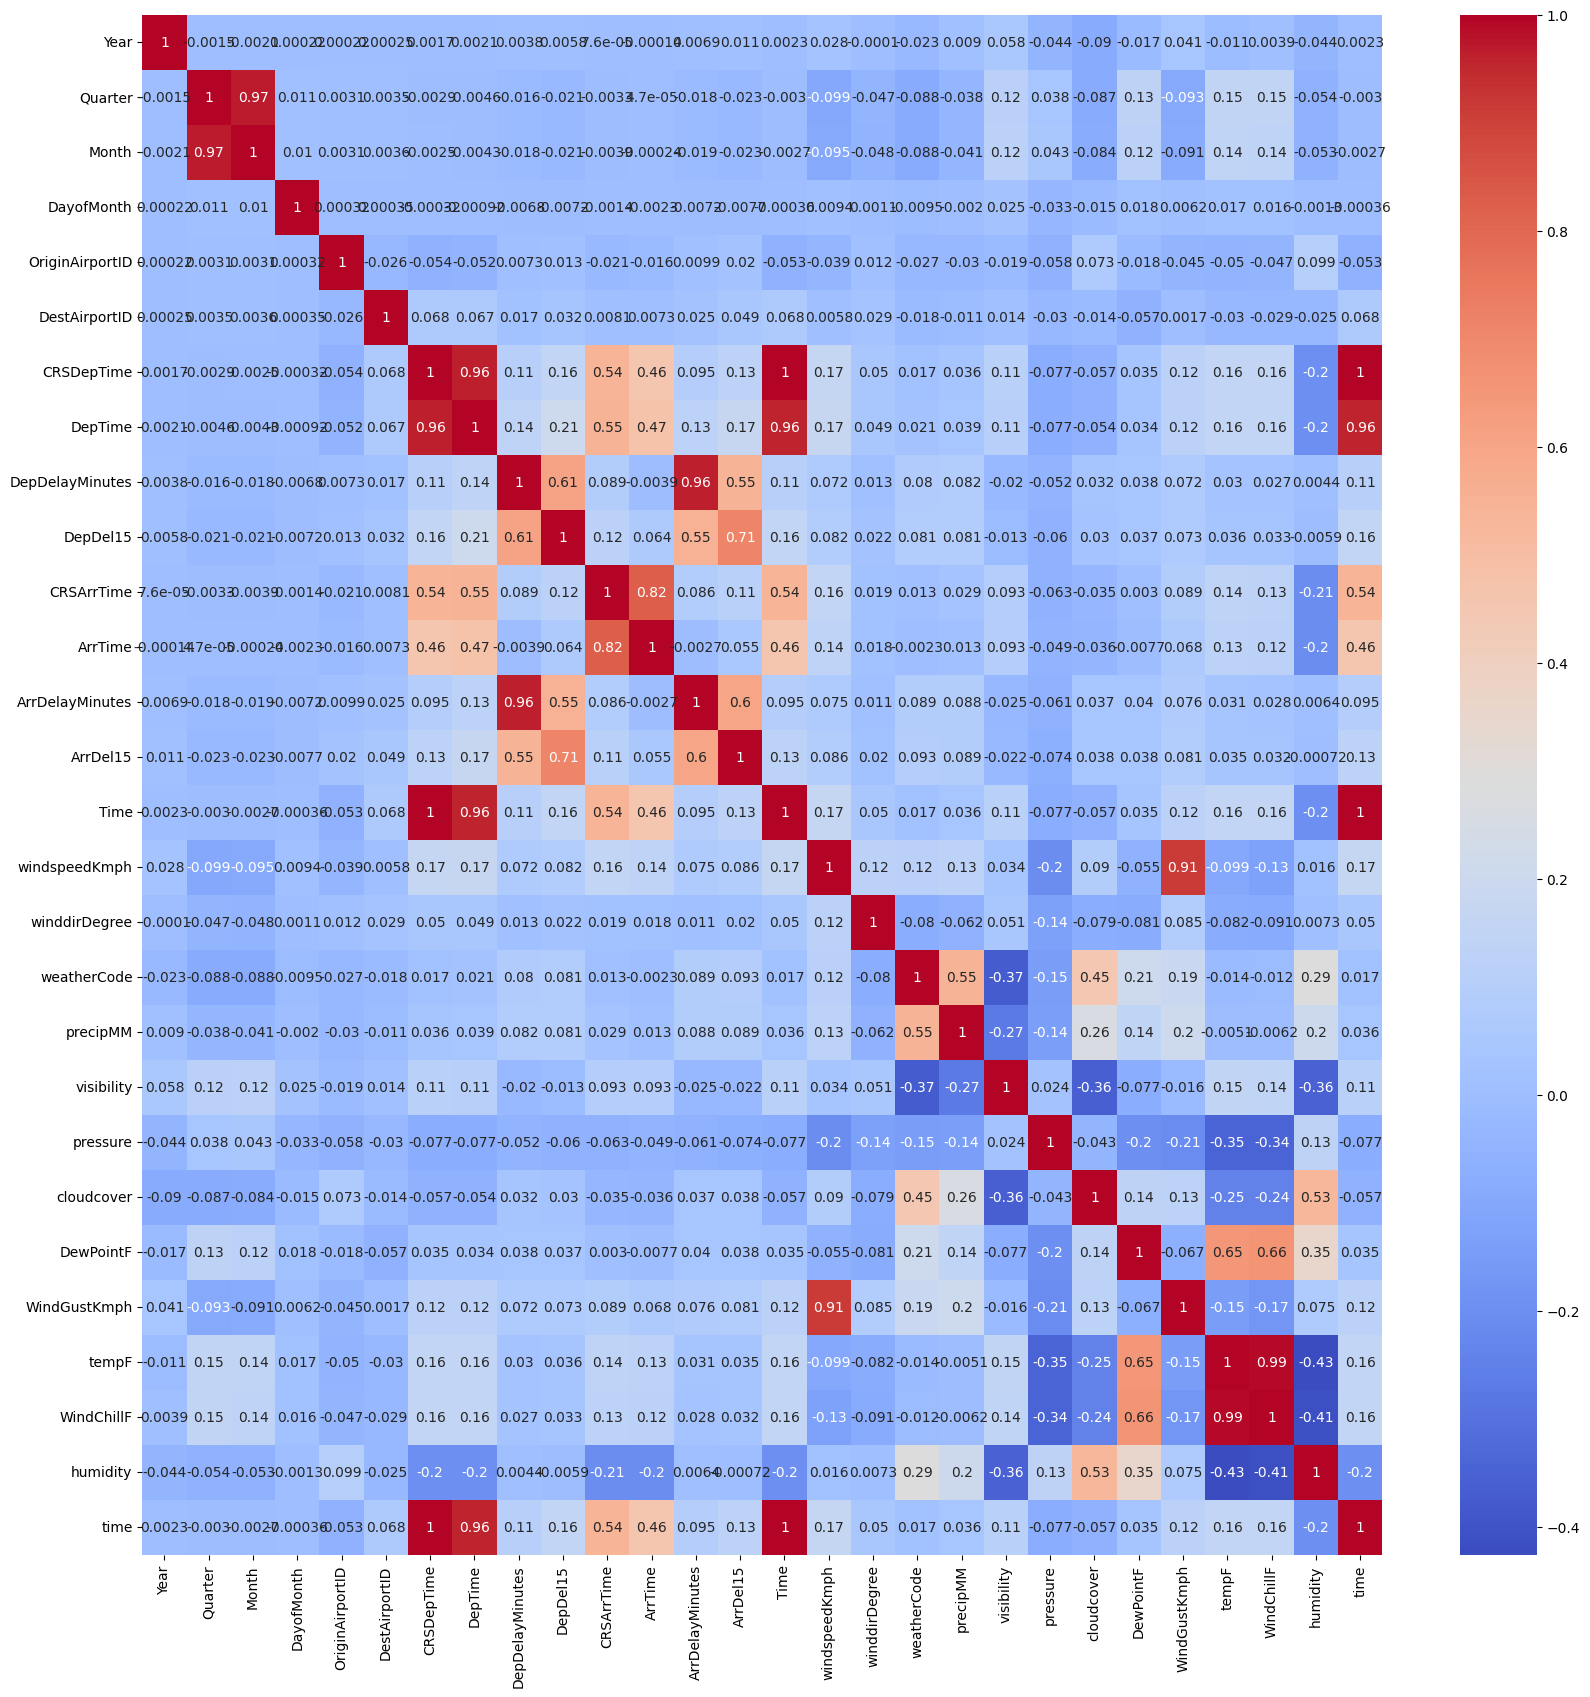

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [31]:
df3 = df3.drop(['Time','DepDelayMinutes','DepDel15','CRSDepTime'],axis = 1)

In [32]:
df3

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,DepTime,CRSArrTime,ArrTime,ArrDelayMinutes,...,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
0,2017,4,12,1,14107,12892,1124.0,1213,1200.0,0.0,...,122.0,0.0,10.0,1015.0,100.0,34.0,12.0,69.0,69.0,28.0
1,2017,4,12,1,14107,12892,1809.0,1852,1829.0,0.0,...,122.0,0.0,10.0,1013.0,100.0,33.0,8.0,75.0,75.0,21.0
2,2017,4,12,1,14107,14771,2001.0,2052,2105.0,13.0,...,116.0,0.0,10.0,1014.0,35.0,37.0,4.0,75.0,75.0,25.0
3,2017,4,12,1,12892,14747,1510.0,1819,1805.0,0.0,...,116.0,0.0,10.0,1015.0,50.0,53.0,16.0,57.0,56.0,85.0
4,2017,4,12,1,11298,14771,1913.0,2133,2115.0,0.0,...,116.0,0.0,10.0,1019.0,7.0,47.0,15.0,69.0,69.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,13204,13930,1128.0,1330,1317.0,0.0,...,302.0,2.3,8.0,1017.0,100.0,56.0,20.0,61.0,59.0,88.0
1877292,2016,1,1,3,14107,11292,2152.0,2259,2338.0,39.0,...,122.0,0.0,10.0,1013.0,99.0,38.0,27.0,62.0,62.0,42.0
1877293,2016,1,1,3,11292,14107,1928.0,2024,2117.0,53.0,...,260.0,0.0,0.0,1031.0,100.0,24.0,10.0,24.0,20.0,100.0
1877294,2016,1,1,3,13930,13204,1039.0,1312,1419.0,67.0,...,122.0,0.0,10.0,1022.0,100.0,21.0,28.0,24.0,12.0,89.0


In [33]:
correlation = df3.corr()

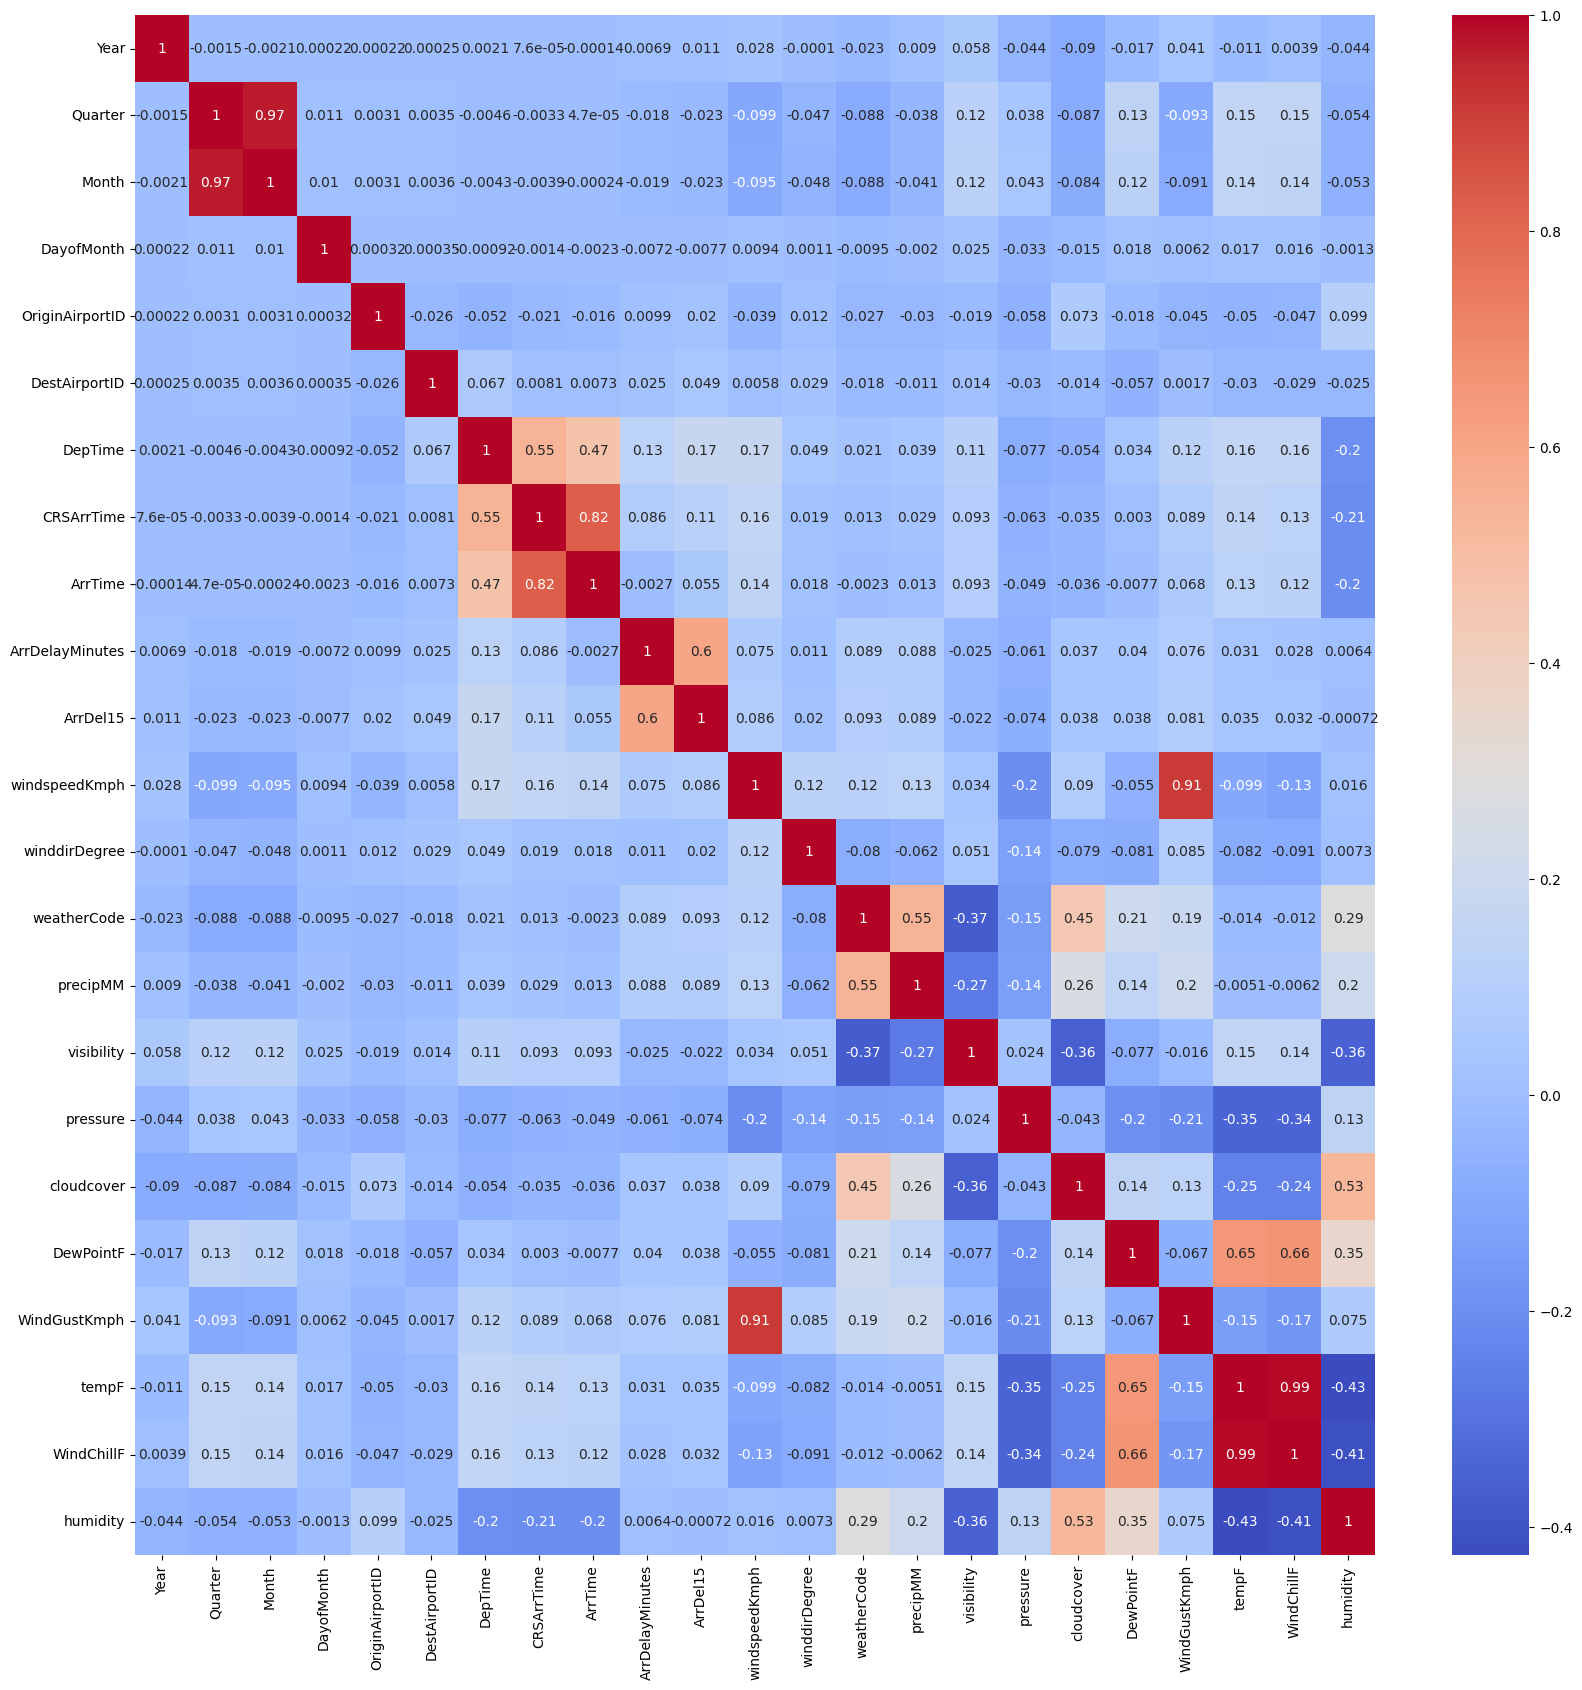

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [35]:
df3 = df3.drop(['WindGustKmph','WindChillF','Quarter','DewPointF'],axis = 1)

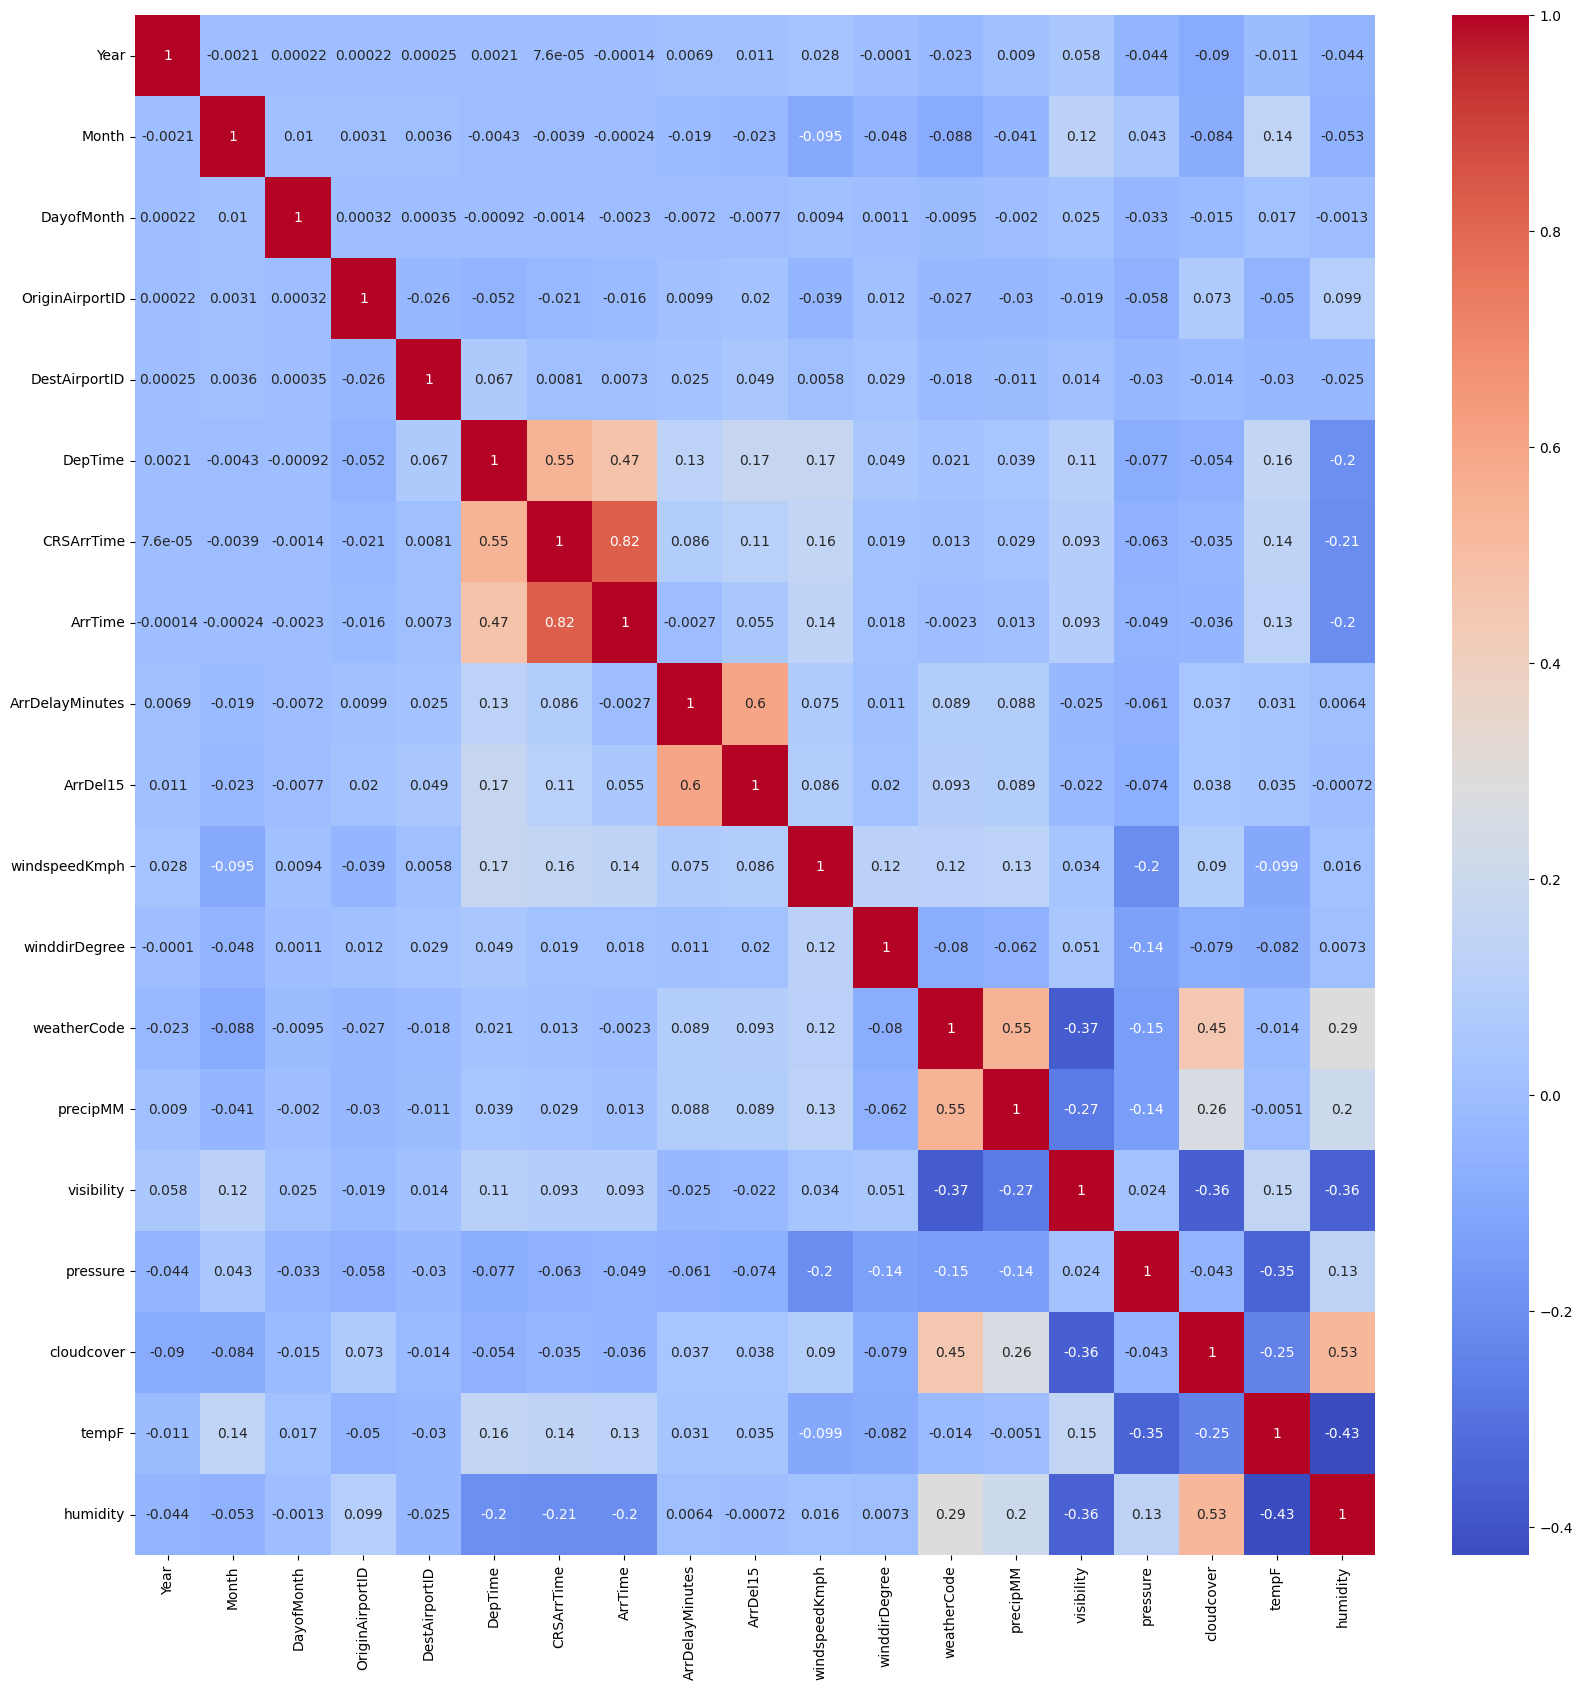

In [36]:
correlation = df3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [37]:
df3 = df3.drop(['CRSArrTime'],axis =1 )

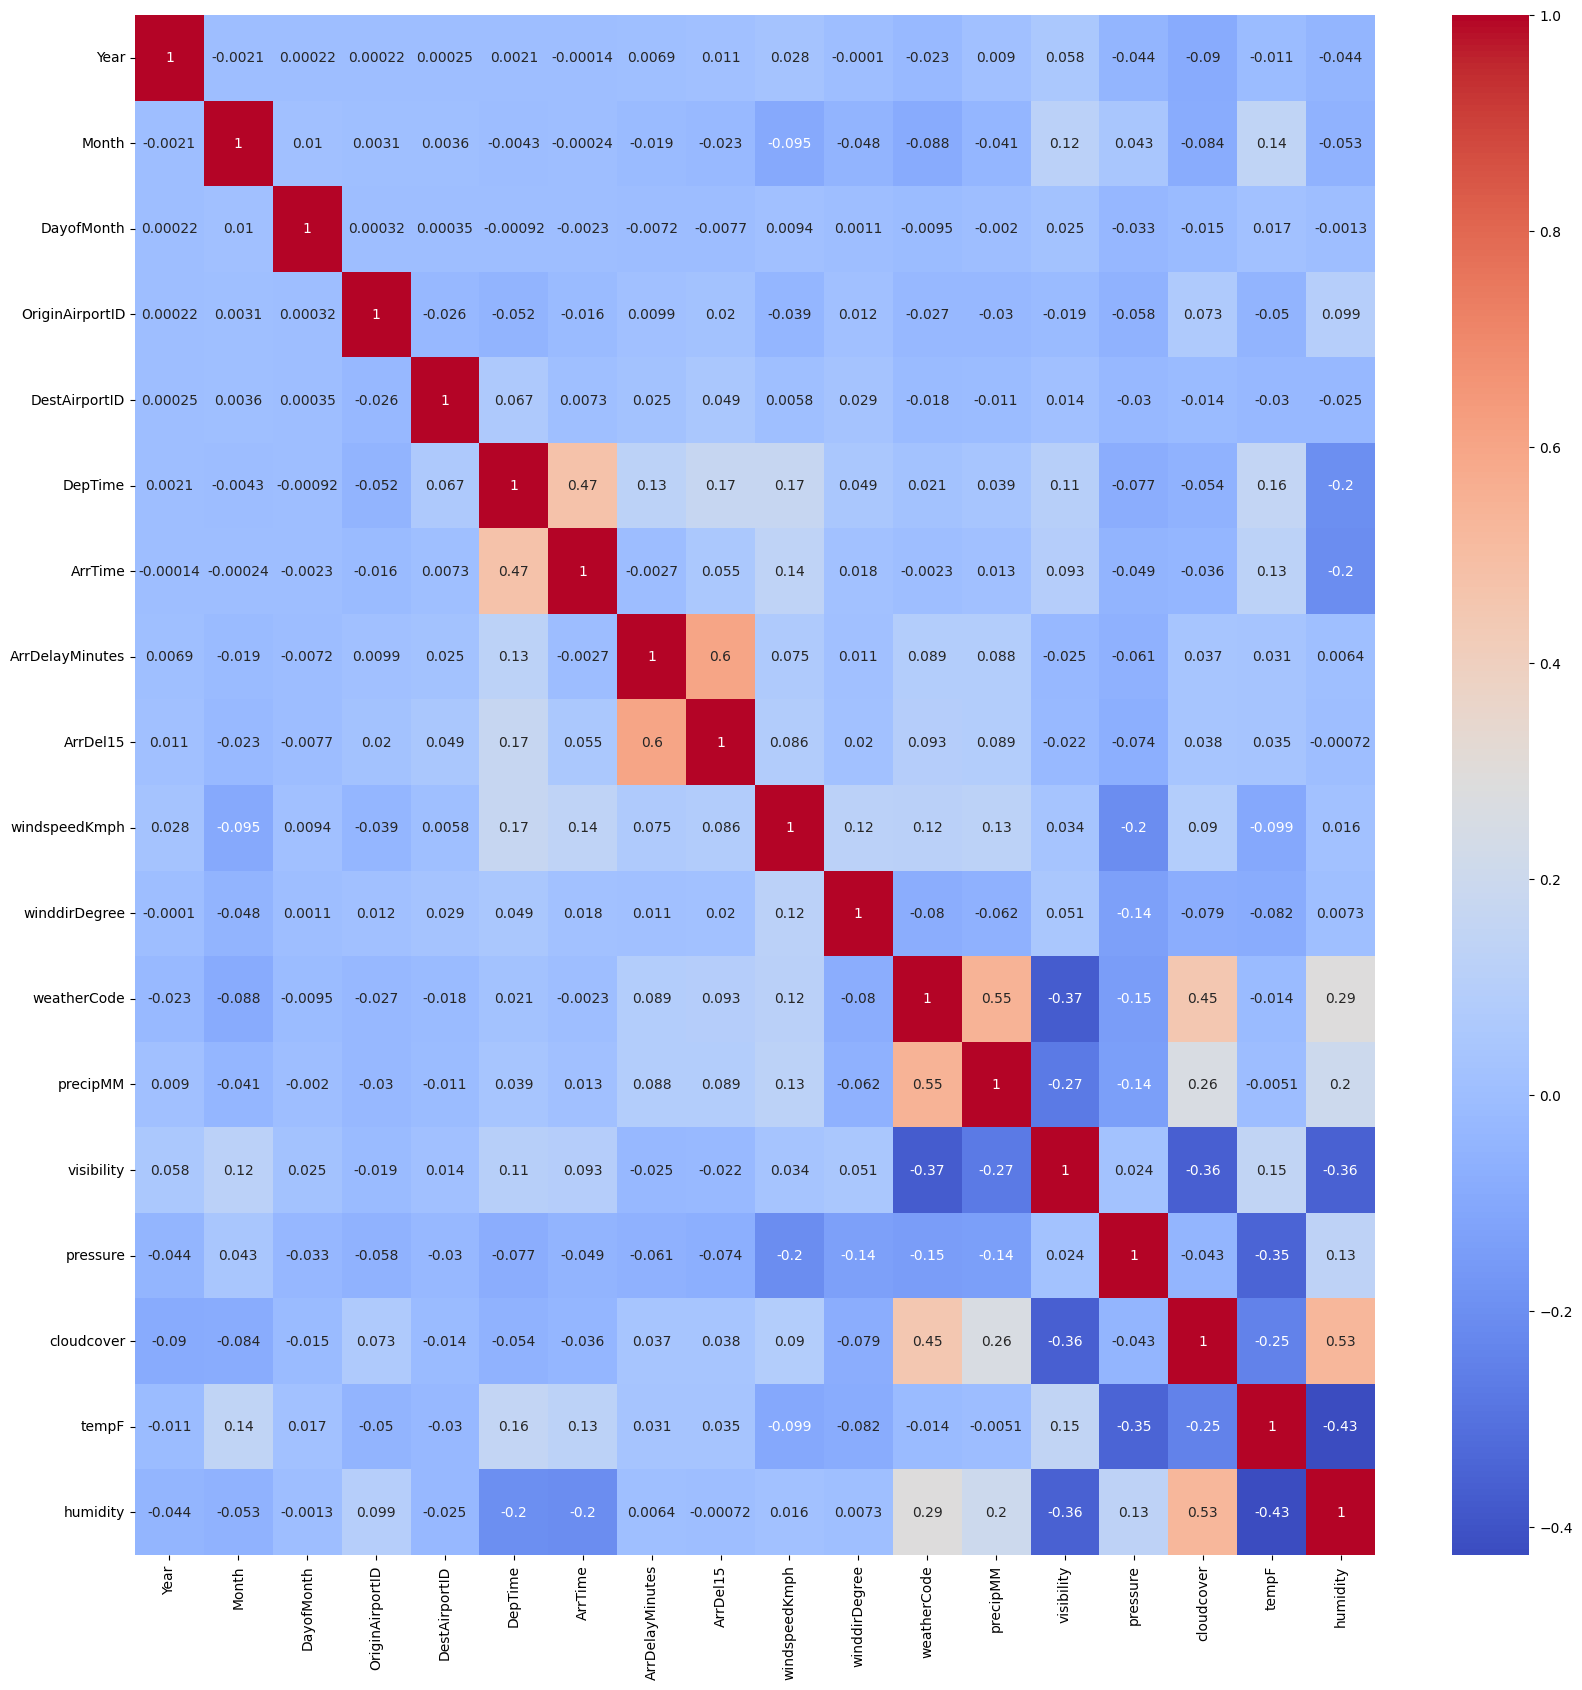

In [38]:
correlation = df3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [40]:
df3.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'tempF', 'humidity'],
      dtype='object')

In [41]:
df3.to_csv('Final_reg.csv')

In [42]:
df3 = df3.drop(['ArrDelayMinutes'],axis =1 )

In [43]:
df3.to_csv('Final_class.csv')